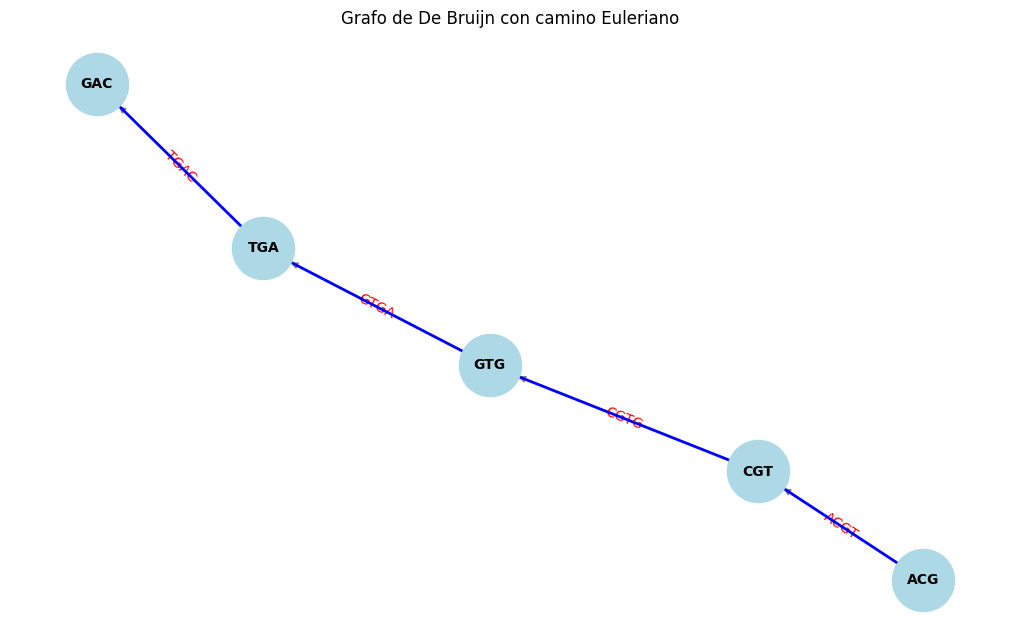

Camino Euleriano: ['ACG', 'CGT', 'GTG', 'TGA', 'GAC']
Secuencia ensamblada: ACGTGAC


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque


#Función para crear prefijos, sufijos y construir el grafo de De Bruijn
def build_de_bruijn_graph(kmers):
    graph = defaultdict(list)
    for kmer in kmers:
        prefix = kmer[:-1]
        suffix = kmer[1:]
        graph[prefix].append(suffix)
    return graph

# Función para determinar si el grafo cumple condiciones de camino o ciclo Euleriano
def has_eulerian_path_or_cycle(graph):
    in_degrees = defaultdict(int)
    out_degrees = defaultdict(int)

    for node, edges in graph.items():
        out_degrees[node] += len(edges)
        for edge in edges:
            in_degrees[edge] += 1

    start_nodes = end_nodes = 0
    for node in set(in_degrees) | set(out_degrees):
        in_deg = in_degrees[node]
        out_deg = out_degrees[node]
        if out_deg - in_deg == 1:
            start_nodes += 1
        elif in_deg - out_deg == 1:
            end_nodes += 1
        elif in_deg != out_deg:
            return False, "No Eulerian path or cycle"
    
    if start_nodes == 0 and end_nodes == 0:
        return True, "Eulerian cycle"
    elif start_nodes == 1 and end_nodes == 1:
        return True, "Eulerian path"
    return False, "No Eulerian path or cycle"

# Función para encontrar un camino Euleriano
def find_eulerian_path(graph):
    path = []
    stack = [next(iter(graph))]
    local_graph = {node: deque(neighbors) for node, neighbors in graph.items()}

    while stack:
        u = stack[-1]
        if u in local_graph and local_graph[u]:
            v = local_graph[u].popleft()
            stack.append(v)
        else:
            path.append(stack.pop())
    return path[::-1]

# Función para reconstruir la secuencia original
def reconstruct_sequence(path):
    sequence = path[0]
    for node in path[1:]:
        sequence += node[-1] 
    return sequence

# Función para crear el grafo de NetworkX para visualización
def create_networkx_graph(graph):
    G = nx.DiGraph()
    for prefix, suffixes in graph.items():
        for suffix in suffixes:
            G.add_edge(prefix, suffix, label=f"{prefix}{suffix[-1]}")
    return G

# Función para obtener y validar la entrada del usuario
def get_kmers_from_user():
    while True:
        kmers_input = input("Ingresa los fragmentos de ADN (k-mers) separados por espacios (ejemplo: ACGT CGTG GTGA TGAC): ")
        kmers = kmers_input.split()
        
        if all(len(kmer) == 4 and all(base in "ACGT" for base in kmer) for kmer in kmers):
            return kmers
        else:
            print("Error: Cada fragmento debe tener exactamente 4 caracteres y solo puede contener 'A', 'C', 'G', o 'T'. Inténtalo de nuevo.")
            print("Ejemplo de formato correcto: ACGT CGTG GTGA TGAC\n")

kmers = get_kmers_from_user()

graph = build_de_bruijn_graph(kmers)

has_eulerian, message = has_eulerian_path_or_cycle(graph)

if has_eulerian:
    eulerian_path = find_eulerian_path(graph)
    assembled_sequence = reconstruct_sequence(eulerian_path)

    # Visualización del grafo
    G = create_networkx_graph(graph)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    for i in range(len(eulerian_path) - 1):
        nx.draw_networkx_edges(G, pos, edgelist=[(eulerian_path[i], eulerian_path[i+1])], edge_color="blue", width=2)

    plt.title("Grafo de De Bruijn con camino Euleriano")
    plt.show()

    print("Camino Euleriano:", eulerian_path)
    print("Secuencia ensamblada:", assembled_sequence)
else:
    print("No es posible ensamblar una secuencia debido a que no cumple con las condiciones de un camino o ciclo Euleriano.")
